# Example of CausticSNUpy usage

## 1. Import packages.

In [1]:
import matplotlib.pyplot as plt
from CausticSNUpy import caustics

## 2. Set parameters.

### README
1. Different parameters can yield slightly different results of caustics.
2. The resulting caustic lines may sometimes diverge near $r=0$ or may be unphysical. If so, try changing the grid size (`r_res` and `v_res`) or distance and velocity ranges (`v_lower`, `v_upper`, `r_max`). You can refer to the output log and see if the `S(k)` value is small enough. Typically, 'physical' results gives`S(k)` value between 0 and 100.
3. Set `center_given` as `True` if you want to use the user-defined center of the cluster.    
    * If the first line only states the number of input galaxies, you MUST set `center_given` as `False`.
    * If the first line gives both the number of input galaxies and the cluster center coordinates, but you set `center_given` as `False`, it will ignore the coordinates given in the input.
    * the first line gives both the number of input galaxies and the cluster center coordinates, and you set `center_given` as `True`, it will fix the cluster coordinates to the the given coordinates.

In [2]:
fpath = 'test_data.txt'                         # your directory to the file; the given test data is of A2107, from Song et al. (2018)
                                                # https://ui.adsabs.harvard.edu/abs/2018ApJ...869..124S/abstract
                                                # In this example, the coordinates of the cluster center is fixed to the one given in the paper

v_lower = 8000                                  # lower bound of velocity that real members should have (km/s)
v_upper = 17000                                 # upper bound of velocity that real members should have (km/s)
v_max = 3000                                    # maximum l.o.s. velocity when drawing the redshift diagram
r_max = 3                                       # maximum projected distance from the center (Mpc)

H0 = 100
Om0 = 0.3
Ode0 = 0.7
Tcmb0 = 2.7

q = 25
r_res = 100                                     # resolution of r_grid
v_res = 100                                     # resolution of v_grid
BT_thr = "ALS"                                  # Binary Tree threshold
center_given = True                             # is center given in the first line of input file?

## 3. Create an instance of caustics with parameters and run the caustic technique.

In [3]:
C = caustics.Caustics(fpath=fpath, v_lower=v_lower, v_upper=v_upper, v_max=v_max, r_max=r_max, center_given=center_given, H0=H0, Om0=Om0, Ode0=Ode0, Tcmb0=Tcmb0, q=q, r_res=r_res, v_res=v_res)
C.run()

Unpacking data.
Hierarchical clustering done.
Number of candidate members : 299
Mean distance       : 0.88289 Mpc
Velocity Dispersion : 579.76700 km/s
Number of galaxies in velocity and r_max limit : 318
Data unpacked.

Estimating number density.
Calculating h_c.
Iteration   1, hc = 0.0050000: M_0 = 8.2701017e-04
Iteration   2, hc = 0.0150000: M_0 = 1.3341923e-04
Iteration   3, hc = 0.0250000: M_0 = 2.5855472e-05
Iteration   4, hc = 0.0350000: M_0 = -1.4584124e-05
Iteration   5, hc = 0.0450000: M_0 = -2.8887371e-05
Iteration   6, hc = 0.0550000: M_0 = -3.2073434e-05
Iteration   7, hc = 0.0650000: M_0 = -3.4140389e-05
Iteration   8, hc = 0.0750000: M_0 = -3.5588354e-05
Iteration   9, hc = 0.0850000: M_0 = -3.6531586e-05
Iteration  10, hc = 0.0950000: M_0 = -3.7205155e-05
Iteration  11, hc = 0.1050000: M_0 = -3.7717467e-05
Iteration  12, hc = 0.1150000: M_0 = -3.8099052e-05
Iteration  13, hc = 0.1250000: M_0 = -3.8423455e-05
Iteration  14, hc = 0.1350000: M_0 = -3.8726205e-05
Iteration  

## 4. Draw the redshift diagram

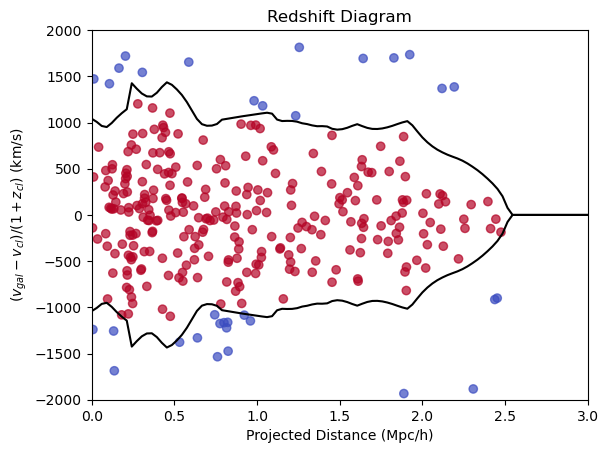

In [4]:
r_grid = C.r_grid       # grid of r-axis
A = C.A                 # Amplitude of caustics

r = C.r                 # Projected distance from cluster center to each galaxies
v = C.v                 # relative l.o.s velocities of galaxies
member = C.member       # boolean array of galaxies; 1 if member, 0 if not

plt.plot(r_grid,  A, c = 'k')
plt.plot(r_grid, -A, c = 'k')
plt.scatter(r, v, c=member, cmap='coolwarm', alpha=0.7)

plt.xlim(0, 3)
plt.ylim(-2000, 2000)

plt.title('Redshift Diagram')
plt.xlabel('Projected Distance (Mpc/h)')
plt.ylabel('$(v_{gal}-v_{cl})/(1+z_{cl})$ (km/s)')

plt.show()

## 5. Add a 4th column to the original data indicating the membership.

In [5]:
C.create_member_list('member_list.txt')     # create file as member_list.txt in the current directory

## 6. Additional: $\sigma$ Plateau

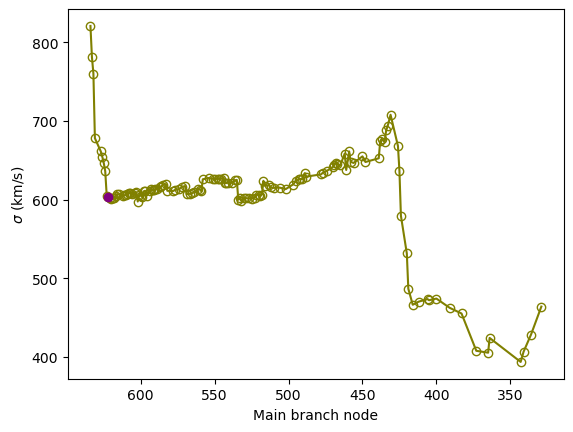

In [6]:
fig, ax = plt.subplots()

ax.plot(C.BT_mainbranch, C.BT_sigma, c='olive', marker='o', markerfacecolor='None')
ax.plot(C.BT_mainbranch[C.BT_cut_idx], C.BT_sigma[C.BT_cut_idx], c='purple', marker='o')    # this is where the binary tree is cut

ax.set_xlabel("Main branch node")
ax.set_ylabel("$\sigma$ (km/s)")

ax.invert_xaxis()

plt.show()